In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



<a class='anchor' id='anchor3'></a >
# Data Intuition and Descriptive Statistics



# 1)

### Data Source:
 Our data comes form the IPUMS CPS source, which is data from the Current Population Survey, from 2022-2024. We choose this time period for easing data management, even just using these four years our dataset was over 5 million rows and 150MB. We also think that including this shortened time period is best to isolate the hangoff effects from covid- since COVID19 had a signifcant impact on hours worked excluding years 2020/2021, is best to get the most clean results.  When selecting our data- we wanted variables most relevant to working hours, so the key catagories our variables were  selected from were  demographic data and societal status. Each row in our dataset represents a specific individual in the United States.

 ###  5 w's

- Who: people in the US, who for all variables are in the universe of sampling for all our varaibles are valid, as well as not containing missing values, or unreasonable values(measured working for more hours in a week than hours in a week for example)
- When: We include data from 2022 onward to safely avoid effects from COVID 19.
- Where: USA
- Why: inlcude the variable that we believe are relevant for predicting hours worked on average per week.
- What: Variable include: 'REGION', 'AGE', 'SEX', 'RACE', 'MARITIAL STATUS', 'NUMBER OF CHILDREN', 'CITIZEN',
       'HOURS WORKED PER WEEK', 'EDUCATION LEVEL', 'INDUSTRY WORKED', 'TOTAL ANNUAL INCOME'

# 2) 
### Data Cleaning/Variable Inspection

The following table shows how the variables we downloaded were orignally encoded in the dataset. We belive that the format that these variables are encoded in are not suitable to our needs for this project, so we will clean and transform some of these variables to better be suited for this project.

Original Variable Inspection-
| #  | Variable Name | Information                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
|----|---------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 1  | Age           | Dtype: int64, gives each person's age at last birthday                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| 2  | Sex           | Dtype: int64, { 1: "male", 2: "female" }                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| 3  | Race          | Dtype: int64, { 100: "White", 200: "Black", 300: "American Indian/Aleut/Eskimo", 650: "Asian or Pacific Islander", 651: "Asian only", 652: "Hawaiian/Pacific Islander only", 700: "Other (single) race, n.e.c.", 801: "White-Black", 802: "White-American Indian", 803: "White-Asian", 804: "White-Hawaiian/Pacific Islander", 805: "Black-American Indian", 806: "Black-Asian", 807: "Black-Hawaiian/Pacific Islander", 808: "American Indian-Asian", 809: "Asian-Hawaiian/Pacific Islander", 810: "White-Black-American Indian", 811: "White-Black-Asian", 812: "White-American Indian-Asian", 813: "White-Asian-Hawaiian/Pacific Islander", 814: "White-Black-American Indian-Asian", 815: "American Indian-Hawaiian/Pacific Islander", 816: "White-Black-Hawaiian/Pacific Islander", 817: "White-American Indian-Hawaiian/Pacific Islander", 818: "Black-American Indian-Asian", 819: "White-American Indian-Asian-Hawaiian/Pacific Islander", 820: "Two or three races, unspecified", 830: "Four or five races, unspecified", 999: "Blank" } |
| 4  | MARST         | Dtype: int64, { 1: "Married, spouse present", 2: "Married, spouse absent", 3: "Separated", 4: "Divorced", 5: "Widowed", 6: "Never married/single", 7: "Widowed or Divorced", 9: "NIU" }                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| 5  | NCHILD        | Dtype: int64, { 0: "0 children present", 1: "1 child present", 2: "2 children present", 3: "3 children present", 4: "4 children present", 5: "5 children present", 6: "6 children present", 7: "7 children present", 8: "8 children present", 9: "9+ children present" }                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| 6  | UHRSWORKT     | Dtype: int64, { 997: "Hours vary", 999: "NIU" }                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| 7  | EDUC          | Dtype: int64, { 0: "NIU or no schooling", 1: "NIU or blank", 2: "None or preschool", 10: "Grades 1, 2, 3, or 4", 11: "Grade 1", 12: "Grade 2", 13: "Grade 3", 14: "Grade 4", 20: "Grades 5 or 6", 21: "Grade 5", 22: "Grade 6", 30: "Grades 7 or 8", 31: "Grade 7", 32: "Grade 8", 40: "Grade 9", 50: "Grade 10", 60: "Grade 11", 70: "Grade 12", 71: "12th grade, no diploma", 72: "12th grade, diploma unclear", 73: "High school diploma or equivalent", 80: "1 year of college", 81: "Some college but no degree", 90: "2 years of college", 91: "Associate's degree, occupational/vocational program", 92: "Associate's degree, academic program", 100: "3 years of college", 110: "4 years of college", 111: "Bachelor's degree", 120: "5+ years of college", 121: "5 years of college", 122: "6+ years of college", 123: "Master's degree", 124: "Professional school degree", 125: "Doctorate degree", 999: "Missing/Unknown" }                                                                                      |
| 8  | Region        | Region code mapped to regions such as Northeast, Midwest, South, West, and Unknown; Dtype: int64                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| 9  | Citizen       | Indication of birthplace in United States or alternatives; Dtype: int64                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| 10 | INCTOT        | Hourly wage at current job; Dtype: float64                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| 11 | INDLY         | Industry last year; Dtype: int64 (2017 Census Classification Scheme)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
                                                                                                                                                                                                                                                                                                                                                                                                               

In [3]:
df=pd.read_csv("/Users/morischacter/Documents/Econ320/Lab/Data/cps_00009.csv")

# Data Cleaning
We notice just by inspecting the dataset, that for the Total Income column and the industry worked last year, there are many missing values, to which we have to clean. So, we want to ensure that across all rows and columns, there will be no missing values, as we need numerical values when doing regressions and various statstical tests later on. As a result, we want to figure out which columns have missing values and then for each column remove these missing values.

In [13]:
df.isna().sum() # We notice the last two columns have a very percentage of missing values that we will have to remove

YEAR               0
REGION             0
AGE                0
SEX                0
RACE               0
MARST              0
NCHILD             0
CITIZEN            0
UHRSWORKT          0
EDUC               0
INDLY        4687380
INCTOT       4687380
dtype: int64

In [20]:
df=df[(~(df["INCTOT"].isna()))&(~(df["INDLY"].isna()))].reset_index().drop(columns="index") 
# We ensure that there is no more missing values in our dataset

Besides these explicit missing values, there are many other codes and values that do not correspond to meaningful information. We want to make sure to extract and produce meaningful results. For example in the INDLY column we have values of 0 as well as for INCTOT column we have values of 9999.. which clearly is not a valid income. 

In [21]:
df

,YEAR,REGION,AGE,SEX,RACE,MARST,NCHILD,CITIZEN,UHRSWORKT,EDUC,INDLY,INCTOT
0,2022,11,42,1,100,6,0,1,48,91,6670.0,44220.0
1,2022,11,62,1,100,1,0,1,28,73,770.0,32702.0
2,2022,11,64,2,100,1,0,1,40,111,9480.0,50050.0
3,2022,11,26,1,100,1,0,1,50,81,8770.0,40001.0
4,2022,11,24,2,300,1,0,1,40,81,8191.0,20000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
443125,2024,42,46,1,100,1,3,1,40,92,6992.0,80225.0
443126,2024,42,45,2,813,1,3,1,40,111,8270.0,50601.0
443127,2024,42,14,2,813,6,0,1,999,1,0.0,999999999.0
443128,2024,42,10,2,813,6,0,1,999,1,0.0,999999999.0


In [10]:
df["INCTOT"].value_counts()

INCTOT
999999999.0    89525
0.0            42041
30000.0         4153
50000.0         2898
40000.0         2857
               ...  
9251.0             1
146152.0           1
55480.0            1
28706.0            1
25615.0            1
Name: count, Length: 74557, dtype: int64

In [136]:
df["is_white"]=df["RACE"].apply(lambda x: True if x==100 else False)
df.drop(columns=["RACE"],inplace=True)

In [137]:
df["IS_MALE"] = df["SEX"].apply(lambda x: True if x == 1 else False)

In [138]:
df["BACH_HIGHER"]=df["EDUC"].apply(lambda x: True if (x >= 111) & (x <= 125) else False)

In [139]:
df["HAVE_CHILDREN"]=df["NCHILD"].apply(lambda x: True if (x >0)  else False)

In [79]:
df["INCTOT"].value_counts()

INCTOT
999999999    246483
0            106656
30000         10499
20000          9386
25000          8082
              ...  
151741            1
62782             1
149667            1
72186             1
12164             1
Name: count, Length: 93045, dtype: int64

In [86]:
df["INC"]

KeyError: 'INC'

In [88]:
df

,Unnamed: 0,AGE,SEX,MARST,NCHILD,CITIZEN,UHRSWORKT,EDUC,INDLY,INCTOT,MIGRATE1,is_white,BACH_HIGHER,IS_MALE,HAVE_CHILDREN
0,0,56,2,1,0,1,50,81,7590,34000,1,True,False,False,False
1,1,59,1,1,0,1,50,123,7870,110000,1,True,True,True,False
2,2,49,2,1,0,1,40,73,7860,16081,1,True,False,False,False
3,3,52,1,1,0,1,40,73,170,146081,1,True,False,True,False
4,4,35,2,1,3,1,37,123,7860,43550,1,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048569,1048569,45,2,1,1,1,35,73,6990,26350,1,True,False,False,True
1048571,1048571,85,2,5,0,1,999,73,0,12468,1,True,False,False,False
1048572,1048572,67,1,1,0,1,2,111,6180,63593,1,True,True,True,False
1048573,1048573,66,2,1,0,1,999,123,0,58528,3,True,True,False,False


(array([6.82177e+05, 8.17100e+03, 3.02600e+03, 3.09000e+02, 1.55000e+02,
        1.13000e+02, 2.22000e+02, 2.20000e+01, 6.00000e+00, 2.00000e+00]),
 array([1.0000000e+00, 1.7002960e+05, 3.4005820e+05, 5.1008680e+05,
        6.8011540e+05, 8.5014400e+05, 1.0201726e+06, 1.1902012e+06,
        1.3602298e+06, 1.5302584e+06, 1.7002870e+06]),
 <BarContainer object of 10 artists>)

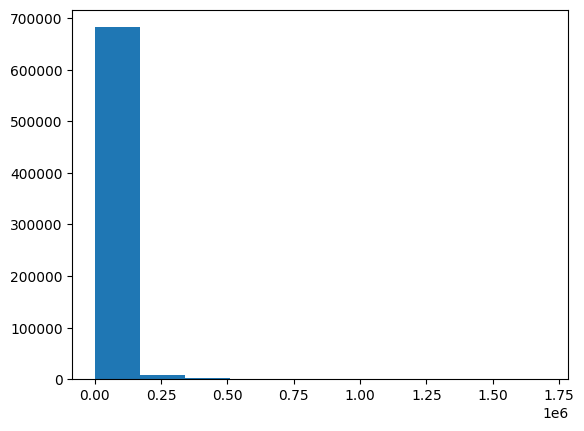

In [93]:
plt.hist(df["INCTOT"])

In [140]:
df=df[(df["INCTOT"]>0)&(df["INCTOT"]!=999999999)]
bins = [-np.inf, 15000, 25000, 50000, np.inf]
labels = ['Below 15k', '15k-25k', '25k-50k', '50k+']
df['INCTOT_CAT'] = pd.cut(df['INCTOT'], bins=bins, labels=labels)
df['INCTOT_CAT'] = pd.cut(df['INCTOT'], bins=bins, labels=labels)

In [141]:
df['below15k'] = (df['INCTOT_CAT'] == 'Below 15k').astype(int)
df['15to25k'] = (df['INCTOT_CAT'] == '15k-25k').astype(int)
df['25to50k'] = (df['INCTOT_CAT'] == '25k-50k').astype(int)


In [120]:
df["AGE"].value_counts()

AGE
80    15142
40    14512
41    14441
48    14415
47    14402
      ...  
76     4253
77     4109
15     3856
78     3850
79     3405
Name: count, Length: 67, dtype: int64

In [148]:
(df[df["AGE"]>=44]["UHRSWORKT"]).mean()

121.24972438681957

In [159]:
df=df[(df["UHRSWORKT"]!=999)&(df["UHRSWORKT"]!=997)]
df=df[df["UHRSWORKT"]>0]
df=df[df["UHRSWORKT"]<=24*7]
df=df[(df["AGE"]>=18)&(df["AGE"]<=65)]

In [160]:
df

,Unnamed: 0,AGE,SEX,MARST,NCHILD,CITIZEN,UHRSWORKT,EDUC,INDLY,INCTOT,MIGRATE1,is_white,IS_MALE,BACH_HIGHER,HAVE_CHILDREN,INCTOT_CAT,below15k,15to25k,25to50k
0,0,56,2,1,0,1,50,81,7590,34000,1,True,False,False,False,25k-50k,0,0,1
1,1,59,1,1,0,1,50,123,7870,110000,1,True,True,True,False,50k+,0,0,0
2,2,49,2,1,0,1,40,73,7860,16081,1,True,False,False,False,15k-25k,0,1,0
3,3,52,1,1,0,1,40,73,170,146081,1,True,True,False,False,50k+,0,0,0
4,4,35,2,1,3,1,37,123,7860,43550,1,True,False,True,True,25k-50k,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048559,1048559,38,2,5,0,1,40,92,2290,17410,3,True,False,False,False,15k-25k,0,1,0
1048564,1048564,38,2,1,2,1,40,92,8190,62003,1,True,False,False,True,50k+,0,0,0
1048565,1048565,42,1,1,2,1,70,92,8270,320005,1,True,True,False,True,50k+,0,0,0
1048568,1048568,50,1,1,1,1,50,111,7290,302850,1,True,True,True,True,50k+,0,0,0
